#### **Project Overview**


This project aims to develop a predictive model for estimating car prices based on various attributes. We are motivated by the dynamic automotive industry, including factors such as the rise of electric vehicles and the impact of the COVID-19 pandemic. Our goal is to provide valuable insights to car manufacturers and sellers, enabling them to make informed pricing decisions.

The objective of this project is to develop an accurate predictive model that estimates car prices by analyzing multiple attributes. By utilizing multiple regression analysis.

#### **Business Problem**
The car manufacturer is facing challenges in determining optimal pricing for their vehicles. They lack a comprehensive understanding of the market dynamics, customer preferences, and competitive landscape, leading to suboptimal pricing decisions. This results in either lost sales opportunities due to overpricing or reduced profitability due to underpricing. The manufacturer needs to find a solution that provides accurate insights into car pricing, enabling them to set competitive prices while maximizing profitability. They require a predictive model that considers various attributes of the cars and market trends to optimize their pricing strategy.

#### **Project Objectives**
1. To enhance pricing accuracy to ensure competitive positioning in the market while maximizing profitability.
2. To conduct in-depth analysis to identify the car type that exhibits the highest sales performance
3. To investigate and analyze the various attributes and features of cars to determine their impact on pricing.


#### **Data Understanding**
This section aims at understanding general overview of the dataset.

We checked for the:
* Columns titles that are in the data to know what we are working with.
* Information about the data.
* Shape of the data to know number of rows and columns.
* Statistical summary of the data.

In [1]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.graphics.gofplots as smg
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("CarPrice_Assignment.csv", index_col= 0)
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
#checking the column heading
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
#information summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
#checking for the shape
df.shape

(205, 25)

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### I**nference**
* This is a Pandas Dataframe with 205 rows and 26 columns i.e symboling, CarName, fueltype, aspiration, doornumber,carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg and price.
* The data types in the data frame are 8 floats, 8 intergers (both numerical figures) and 10 objects(categorical figures) variables.
* The data info shows that there is no missing values in the dataset. The missing values can be identified by taking number of entries minus the non null count per column.
From the describe function the minimum price of a car is usd 5,118, maximum being usd 45,400. Most of the cars cost usd 10,295.
* The Memory usage for this dataFrame is 41.8+ KB

#### **Data Cleaning and Preparation**
To perform data clean and preparation for analysis, we start with :

* Checking duplicates in the dataset.
* Droping duplicates if necessary.
* Identifying and handling NaN (Not a Number) /missing values.
* checking for outliers.



In [9]:
#checking for duplicates
df.duplicated().sum()

0

In [10]:
#checking for missing values
df.isna().sum().sum()

0

In [11]:
#checking for numeric columns
numeric_df = df.select_dtypes('number')
numeric_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [12]:
numeric_df.shape # to check on the numeric columns in the dataset

(205, 15)

In [13]:
# Confirm numeric columns in the dataset
numeric_df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

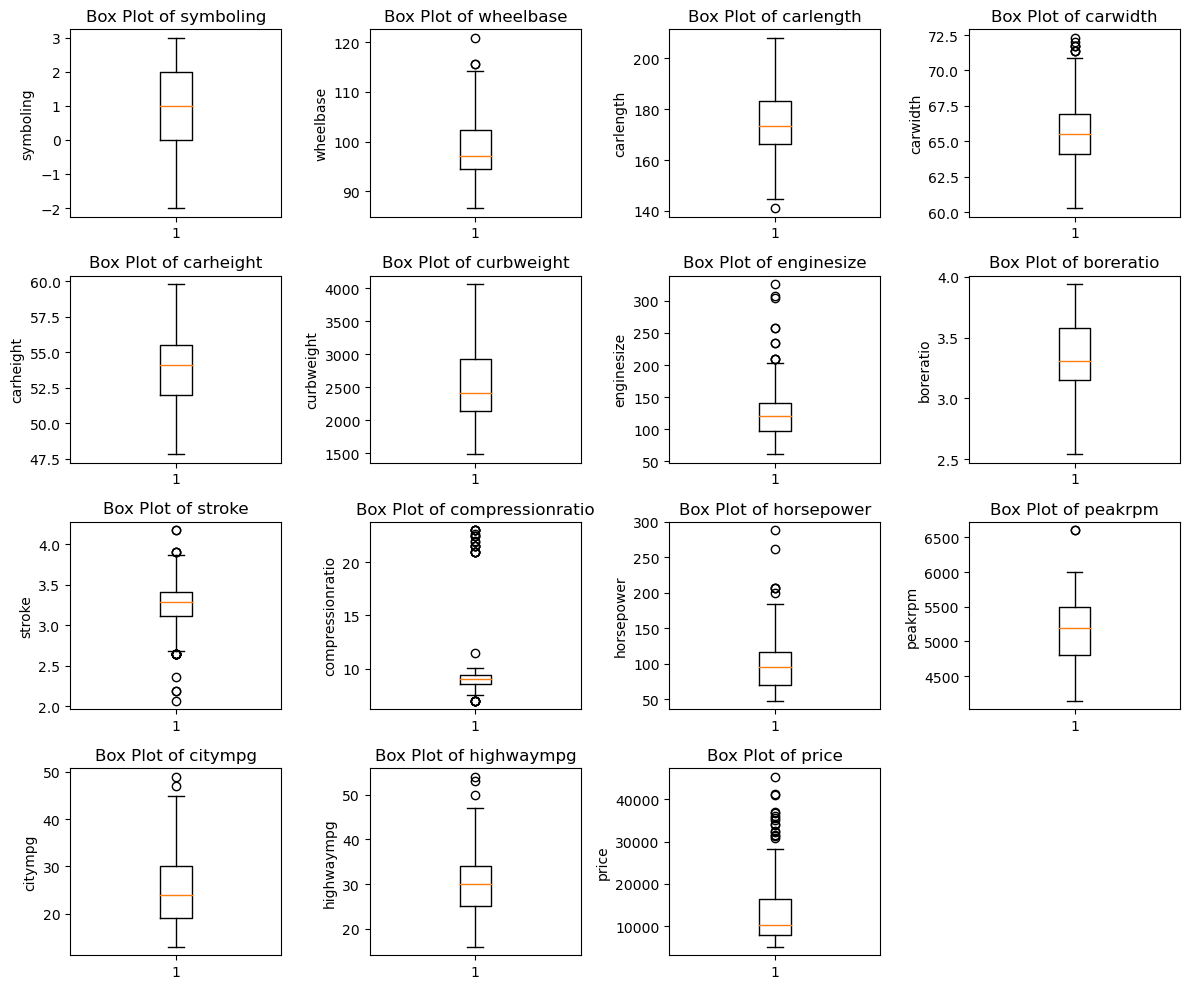

In [14]:
#Checking for outliers in the numeric columns using boxplot.

# Set the number of columns and rows for the grid layout
ncols = 4
nrows = 4
# Create a new figure with the desired size
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
# Flatten the axs array to simplify indexing
axs = axs.flatten()
# Iterate over the numeric columns and create box plots
for i, column in enumerate(numeric_df.columns):
    # Create the box plot for the current column
    axs[i].boxplot(numeric_df[column])
    # Set the y-axis label to the column name
    axs[i].set_ylabel(column)
    # Set the title of the plot
    axs[i].set_title('Box Plot of ' + column)
# Hide any unused subplots
for j in range(len(numeric_df.columns), nrows * ncols):
    fig.delaxes(axs[j])
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

#### **Inference**
Based on the analysis above:
- There was no duplicate values
- There was no missing value
- We created a new dataframe (numeric_df) that contains only numeric columns.
- We ploted box plots to check for outliers in the columns. The column that has the most outliers is compressionration but we decided to retain as this may be the real information and may not affected our analysis.

#### **Exploratory data analysis**

####  **Univeriate Analysis**
In this step we will check on the descriptive statistics and plot the histograms to show the distribution of the dataset .

Descriptive statistics - are brief informational coefficients that summarize a given data set, which can be either a representation of the entire population or a sample of a population. Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis, and skewness.

In [15]:
#Descriptive statistics
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


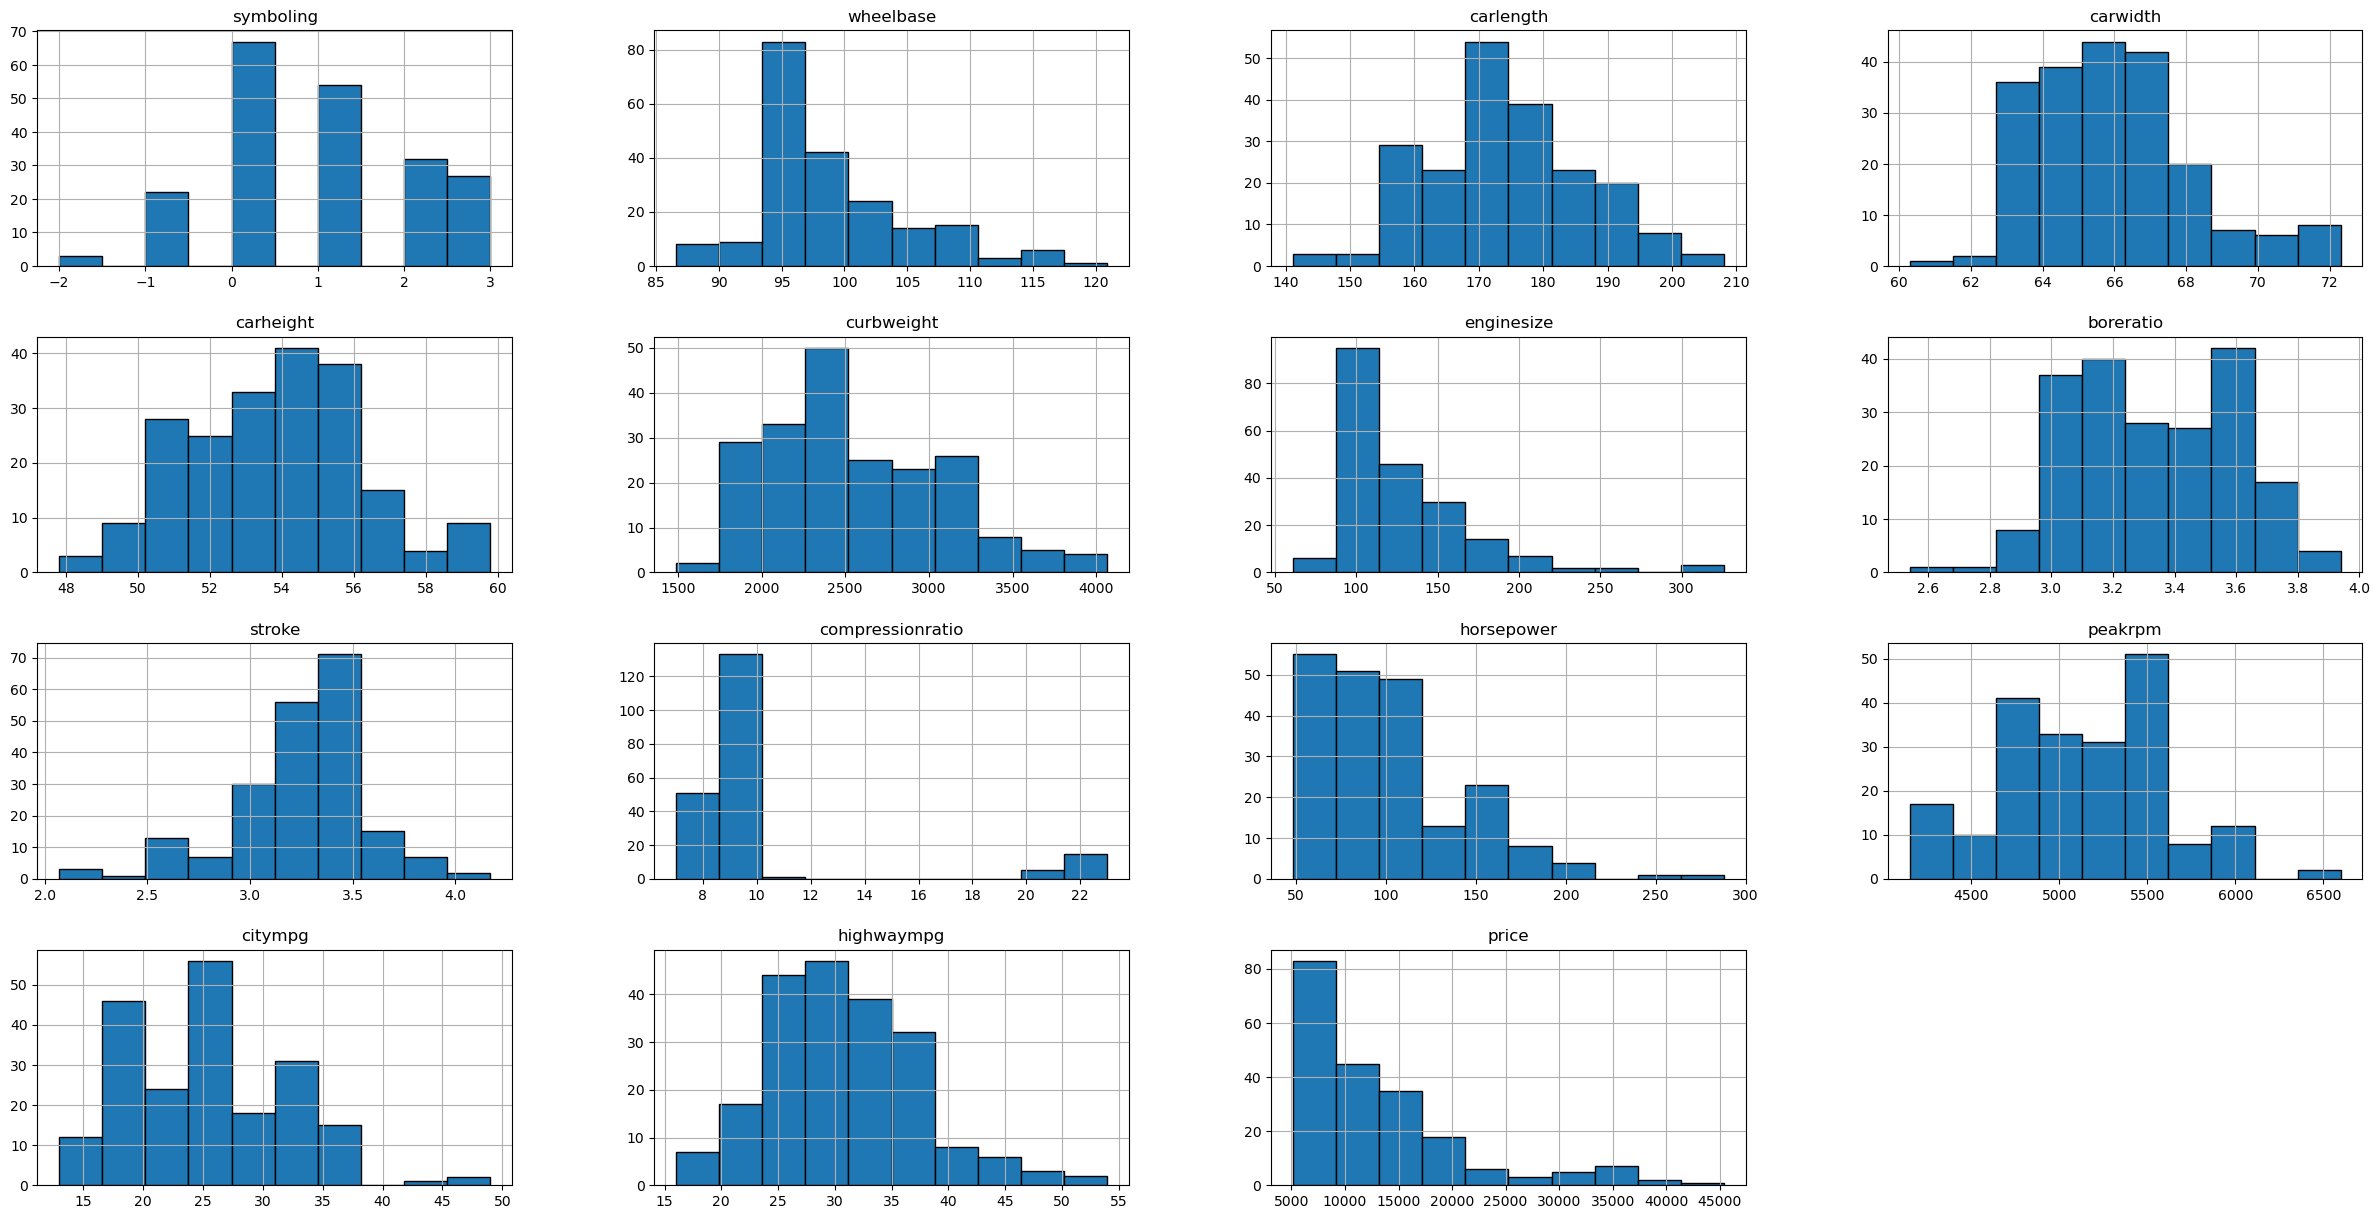

In [16]:
# checking for the distribution of the data using histograms
df.hist(figsize=(30,15), edgecolor = 'black');


#**Inference**
The above analysis shows that:
1. Enginesize, horsepower, price, and wheelbase exhibit a right-skewed distribution. This suggests that most values are concentrated towards the lower end, with a few larger values extending the tail towards the higher end.

2. Stroke,carheight and peakrpm on the other hand, demonstrates a left-skewed distribution. This implies that the majority of stroke, carheight and peakrpm values are concentrated towards the higher end, with fewer instances of lower values.

3. Car length, car width, highwaympg, and curbweight exhibit distributions that are approximately normal or bell-shaped. This indicates that these features are relatively evenly distributed around their mean values, with a similar number of occurrences on both sides of the central tendency.

In [17]:
# Checking for categorical variables
categorical_df = df.select_dtypes('object')
categorical_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


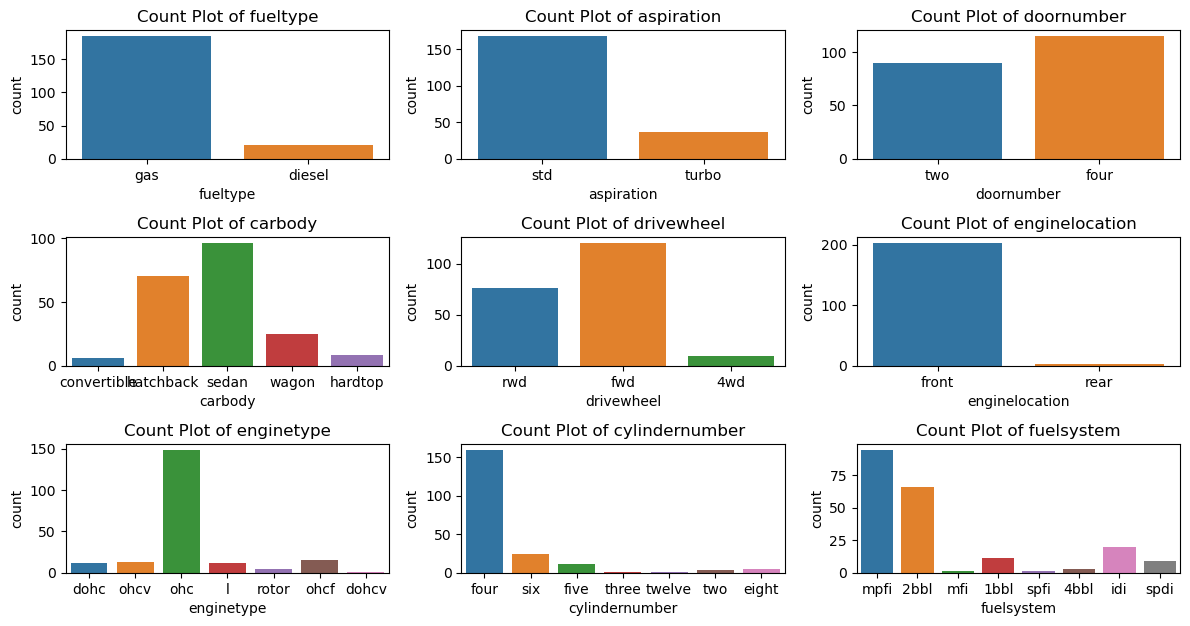

In [18]:
#checking for the distribution of the categorical data and plotting bargraphs
# Selecting the categorical columns
category_columns = ['fueltype', 'aspiration', 'doornumber',
                    'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                    'cylindernumber', 'fuelsystem']
# Set the number of columns and rows for the grid layout
ncols = 3
nrows = 4
# Create a new figure with the desired size
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
# Flatten the axs array for easy indexing
axs = axs.flatten()
# Iterate over the category columns and create count plots
for i, column in enumerate(category_columns):
    sns.countplot(x=column, data=df, ax=axs[i])
    axs[i].set_title('Count Plot of ' + column)
# Hide any unused subplots
for j in range(len(category_columns), nrows * ncols):
    fig.delaxes(axs[j])
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()



For the categorical variables, we plotted bar plots to get a sense of the distribution of our categorical data.

### **Bivariate**

In the bivariate analysis we took a lookat the relationship between the price which is the target variable and each feature.

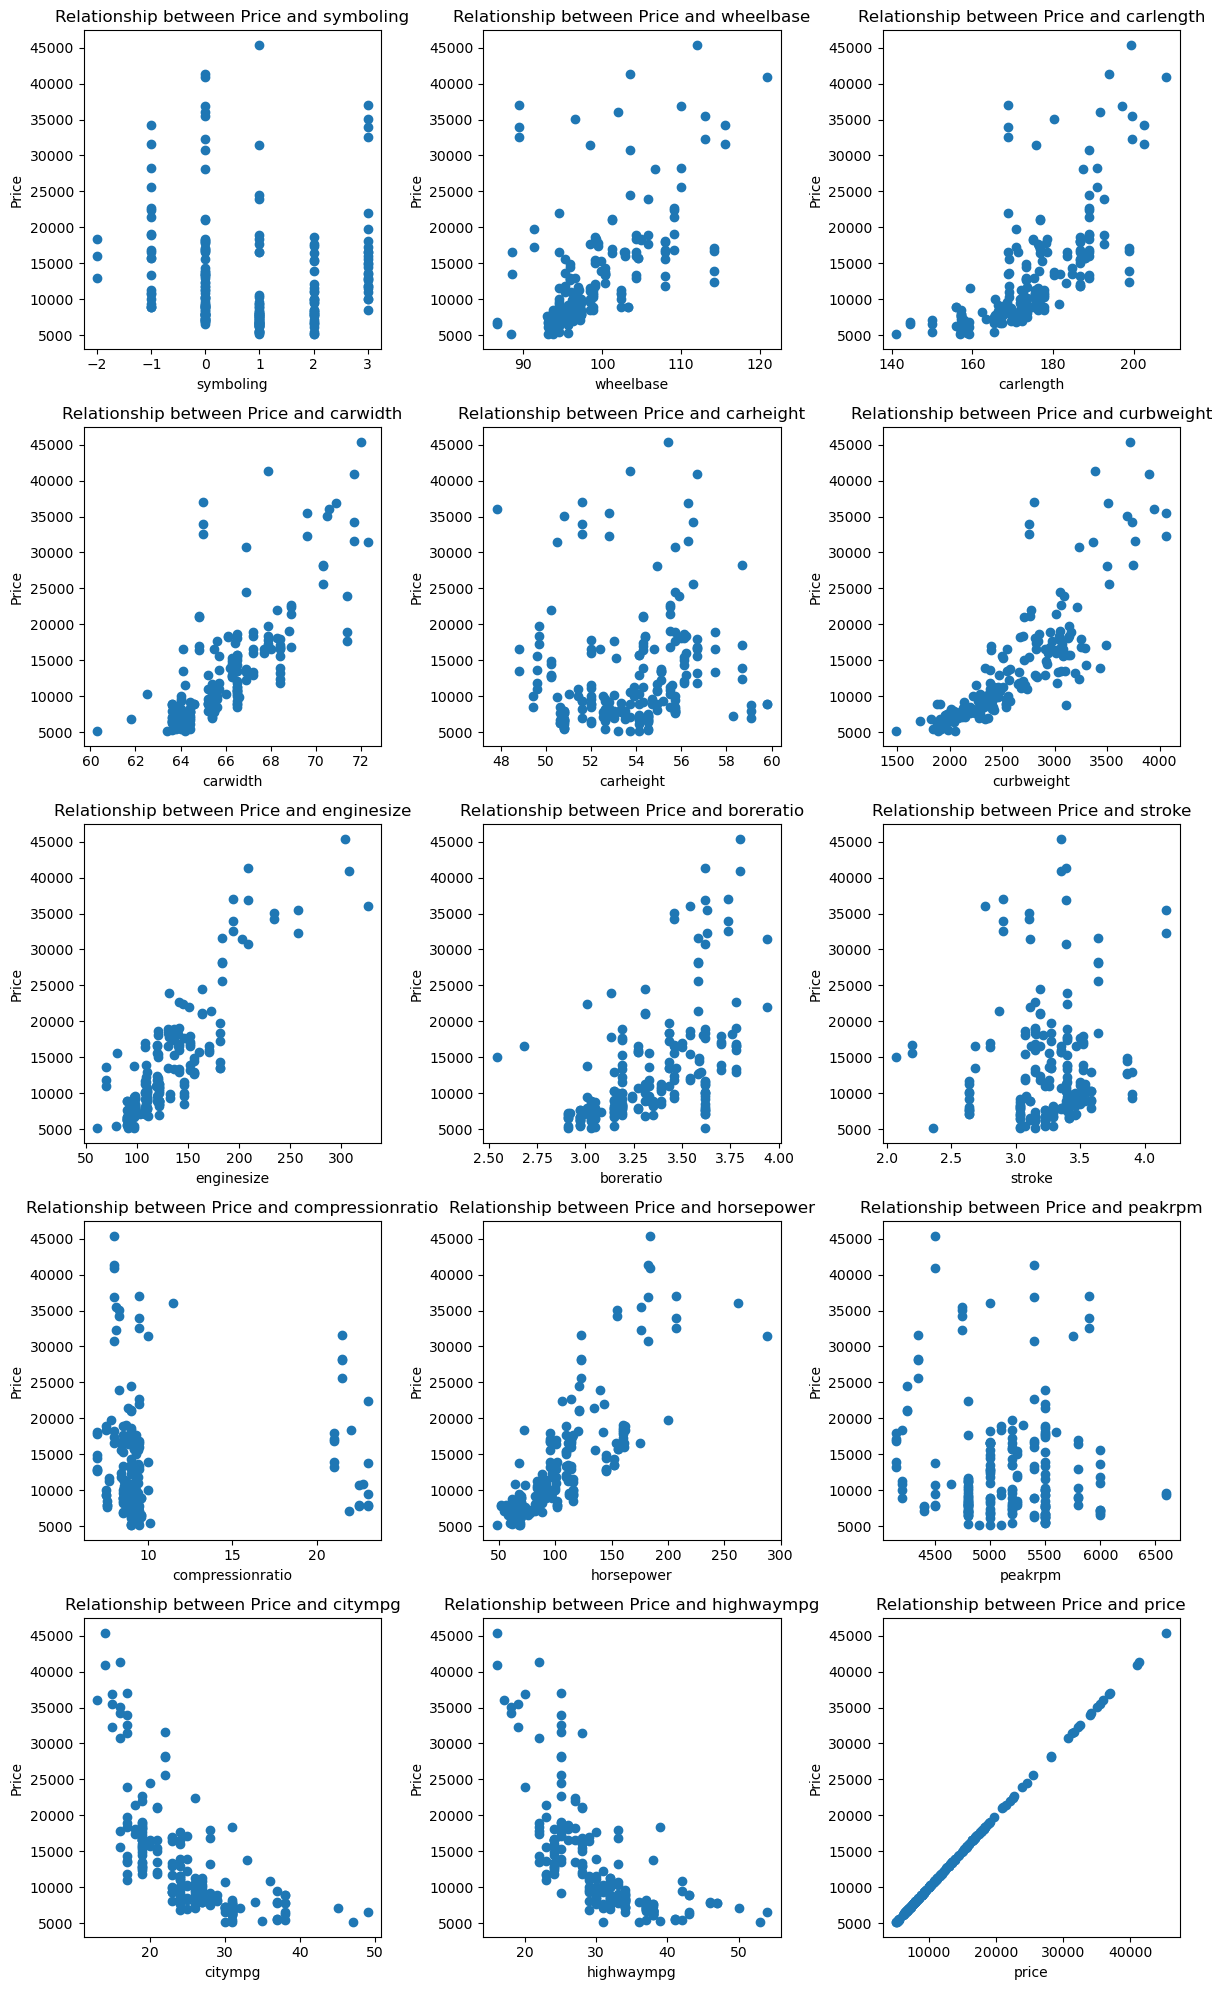

In [19]:
#relationships between our target variable and other independent variables in the dataset
variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[var], df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')
plt.tight_layout()
plt.show()

In [20]:
categorical_df = categorical_df.drop("CarName", axis=1)
categorical_df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
201,gas,std,four,sedan,rwd,front,ohc,four,mpfi
202,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
203,gas,std,four,sedan,rwd,front,ohcv,six,mpfi


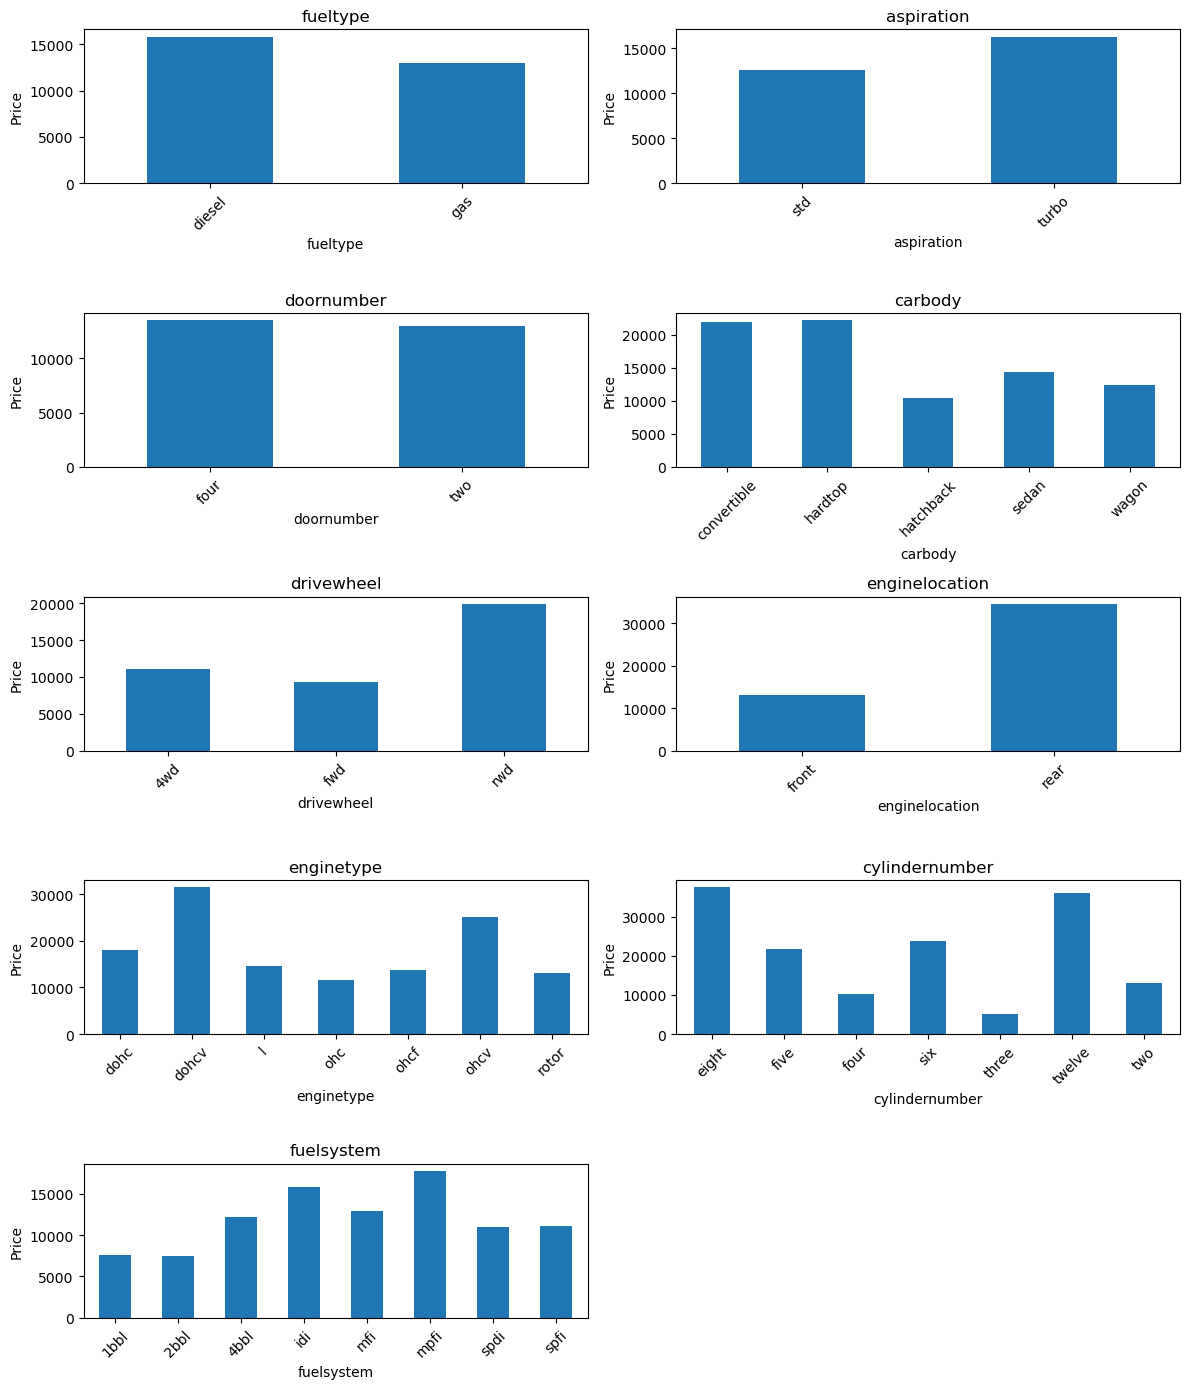

In [21]:
# List of categorical columns
categorical_df = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                   'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
                   'fuelsystem']

# Calculate the number of rows and columns needed for subplots
num_columns = len(categorical_df)
num_rows = (num_columns - 1) // 2 + 1

# Create subplots with specified number of rows and columns
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 14))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plotting bar graphs for each categorical column against "price"
for i, column in enumerate(categorical_df):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    df.groupby(column)['price'].mean().plot(kind='bar', ax=ax)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# If the number of categorical columns is odd, remove the empty subplot
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()  # Automatically adjust spacing between subplots and labels
plt.show()


#### Multivariate analysis

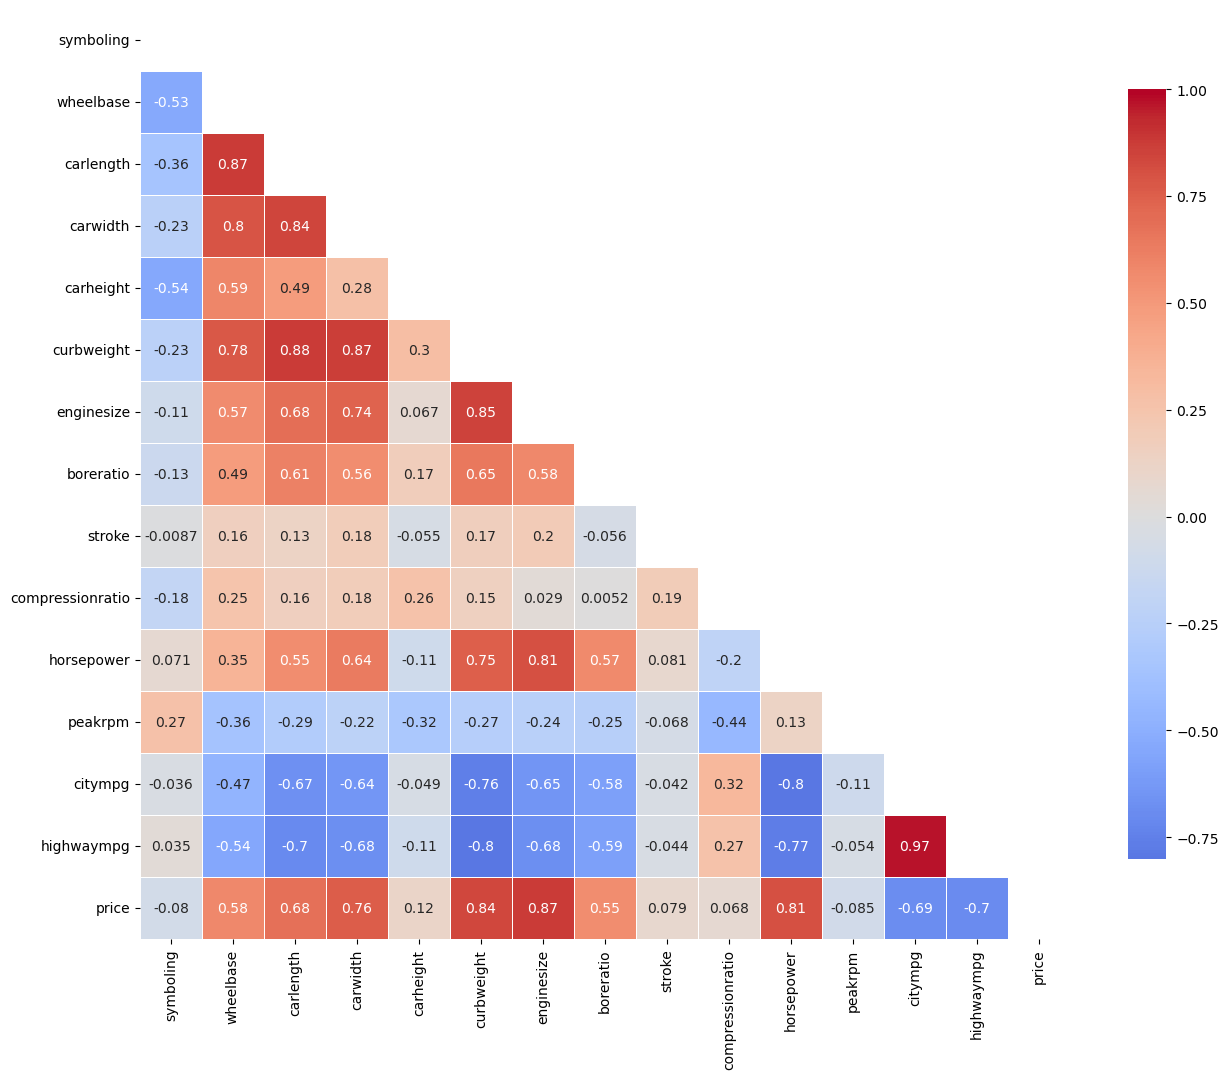

In [22]:
 # HEATMAP FOR CORRELATION DATAFRAME

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [23]:
df_copy=df[["price","enginesize","curbweight","boreratio","wheelbase","fueltype","enginetype"]]
df_copy.head(5)

,price,enginesize,curbweight,boreratio,wheelbase,fueltype,enginetype
car_ID,,,,,,,
1,13495.0,130,2548,3.47,88.6,gas,dohc
2,16500.0,130,2548,3.47,88.6,gas,dohc
3,16500.0,152,2823,2.68,94.5,gas,ohcv
4,13950.0,109,2337,3.19,99.8,gas,ohc
5,17450.0,136,2824,3.19,99.4,gas,ohc


 **Modelling**

##### Linear Modelling
Checking for the Linearity Assumption.
Here, we assert two things before building our model;

We want to include the features which have the highest correlation with our target variable(price).

While following the condition above, we want our features not to be multicorrelated with each other.

In [24]:
df_copy.corr()["price"]

price         1.000000
enginesize    0.874145
curbweight    0.835305
boreratio     0.553173
wheelbase     0.577816
Name: price, dtype: float64

In [25]:
# Assigning our features and target variables
X = df["enginesize"]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data as sklearn expects a 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Baseline Model with sklearn
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)
baseline_rmse = mean_squared_error(y_test, baseline_predictions, squared=False)
#The squared=False parameter ensures that the RMSE is returned instead of the mean squared error.

# Calculate R-squared
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean)**2)
ss_residual = np.sum((y_test - baseline_predictions)**2)
r_squared = 1 - (ss_residual / ss_total)

# Print Baseline Model Summary
# print("Mean Squared Error:", mse)
print("Baseline Model RMSE:", baseline_rmse)
print("R-squared:", r_squared)
print("Coefficient:", baseline_model.coef_[0])
print("Intercept:", baseline_model.intercept_)


Baseline Model RMSE: 3932.6147746643665
R-squared: 0.8040958796678975
Coefficient: 165.84456256103232
Intercept: -7741.765067166598


The baseline model is a linear regression model that predicts car prices based on the engine size. The model has the following characteristics:

1. Root Mean Squared Error (RMSE): The RMSE of the model is 3932.61. This metric represents the average deviation between the predicted car prices and the actual prices in the dataset. Lower RMSE values indicate better predictive performance.

2. R-squared: The R-squared value of the model is 0.804. This metric measures the proportion of the variance in the car prices that can be explained by the engine size. An R-squared value of 0.804 indicates that the engine size explains approximately 80.4% of the variability in car prices.

3. Coefficient: The coefficient for the engine size is 165.84. This value represents the estimated change in car price for a one-unit increase in engine size, assuming other variables are held constant. A positive coefficient suggests that larger engine sizes tend to be associated with higher car prices.

4. Intercept: The intercept of the model is -7741.77. This value represents the estimated car price when the engine size is zero. In practical terms, it indicates a baseline price regardless of the engine size. However, since an engine size of zero is not meaningful in this context, the intercept should be interpreted with caution.

In summary, the baseline model based on the engine size shows promising results with a relatively low RMSE and a reasonably high R-squared value. The positive coefficient for the engine size suggests that larger engines tend to have higher prices. However, it is important to note that this model only considers a single predictor variable and there may be other factors influencing car prices that are not accounted for. Further analysis and refinement of the model are done below  to improve predictive performance and a better understanding of the factors driving car prices.

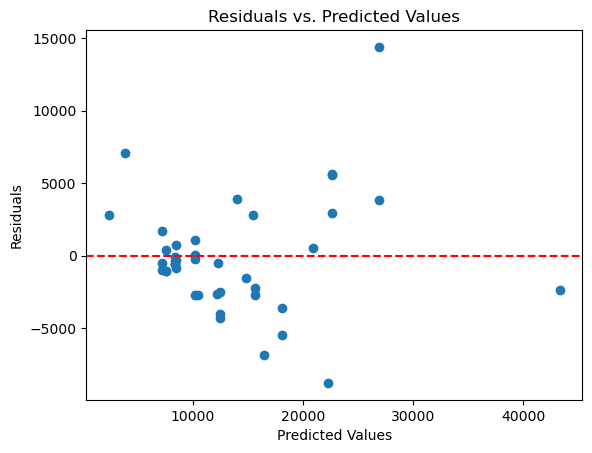

In [26]:
# calculate the residuals
residual = y_test - baseline_predictions
# Plot residuals vs. predicted values
plt.scatter(baseline_predictions, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()



Homoscedasticity: Homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the predicted values. In this residual plot, the residuals do not apper to be consistent. 



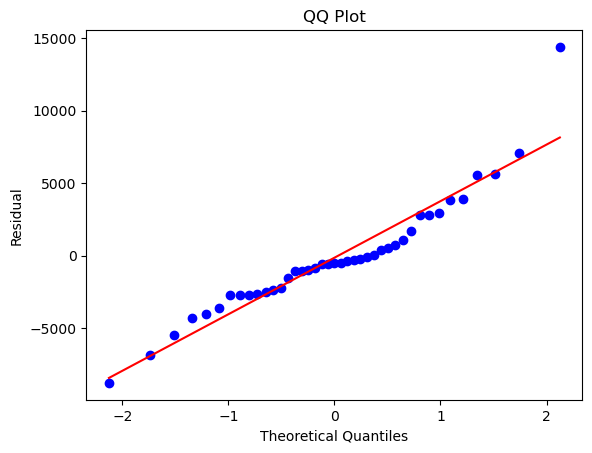

In [27]:
# QQ plot
stats.probplot(residual, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residual")
plt.show()

1. Normality: The primary purpose of a QQ plot is to evaluate the normality assumption of the data.The data points slightly deviations from a the straight line which indicates departures from normality.

2. Skewness and Kurtosis: The data points deviate from the straight line towards the tails, it suggests skewness (asymmetric distribution).Then the data points have also deviated in the center a little bit which indicates kurtosis (heaviness of the tails).



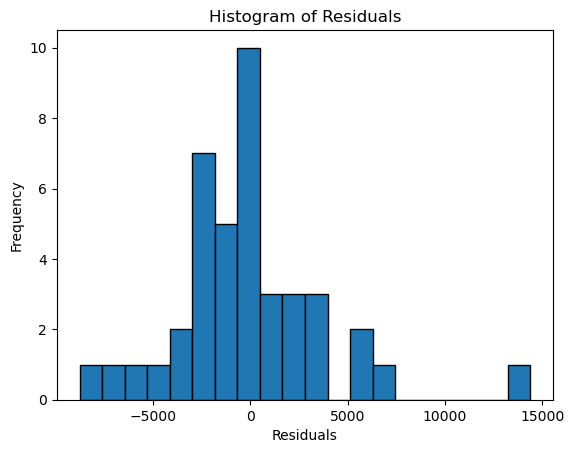

In [28]:
# Plot a histogram of the residuals
plt.hist(residual, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The histogram can help assess whether the residuals follow a normal distribution.In this case it is right skewed indicating that there might be outliers in our data set



## **Model** 2

## **Prepocessing**
Data preprocessing plays a crucial role in preparing raw data for analysis and modeling. In this particular scenario, we will focus on performing one-hot encoding, a technique used to transform categorical data into a numeric format. By applying one-hot encoding, we can effectively represent categorical variables in a way that allows us to utilize them in our models.

##  OneHotEncoding
One-hot encoding is chosen as it converts categorical variables into binary vectors, where each category is represented by a separate column. This transformation enables us to capture the inherent relationships and patterns within the categorical data, making it compatible with our machine learning algorithms.

By employing one-hot encoding, we can leverage the power of the data, enhance the accuracy of our models, and effectively incorporate categorical features into our analysis. This preprocessing step is an essential component in ensuring the our data's readiness for subsequent modeling and analysis tasks, enabling us to extract meaningful insights and make informed decisions.








In [30]:
def perform_one_hot_encoding(data, columns):
    return pd.get_dummies(data, columns=columns, drop_first=True)

#perform OneHotEncoding on enginetype, fueltype
encoded_df = perform_one_hot_encoding(df_copy, ['enginetype', 'fueltype'])
encoded_df

,price,enginesize,curbweight,boreratio,wheelbase,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas
car_ID,,,,,,,,,,,,
1,13495.0,130,2548,3.47,88.6,0,0,0,0,0,0,1
2,16500.0,130,2548,3.47,88.6,0,0,0,0,0,0,1
3,16500.0,152,2823,2.68,94.5,0,0,0,0,1,0,1
4,13950.0,109,2337,3.19,99.8,0,0,1,0,0,0,1
5,17450.0,136,2824,3.19,99.4,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
201,16845.0,141,2952,3.78,109.1,0,0,1,0,0,0,1
202,19045.0,141,3049,3.78,109.1,0,0,1,0,0,0,1
203,21485.0,173,3012,3.58,109.1,0,0,0,0,1,0,1


In [31]:
encoded_df.columns

Index(['price', 'enginesize', 'curbweight', 'boreratio', 'wheelbase',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fueltype_gas'],
      dtype='object')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assigning the features and target variables
X = encoded_df[['enginesize', 'curbweight', 'boreratio', 'wheelbase', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fueltype_gas']]
y = encoded_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("R-squared:", r_squared)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 12580159.90514516
Root Mean Squared Error (RMSE): 3546.852112105206
R-squared: 0.840644550847969
Coefficients: [ 1.32641921e+02  6.99303092e+00 -3.41503332e+03 -3.10263145e+01
  6.27496210e+03 -4.25712283e+02  2.12596676e+03  5.26457228e+03
 -3.47419310e+03  1.02097649e+04  3.07136576e+02]
Intercept: -9138.230171587838


Summary of the Model:

1. Mean Squared Error (MSE): The MSE value for this model is 12,580,159.91. MSE represents the average squared difference between the predicted and actual values. 

2. Root Mean Squared Error (RMSE): The RMSE value for this model is 3,546.85. It has slightly dropped from the previous model which signifies an improvement of the model.

3. R-squared (R2): The R-squared value for this model is 0.841, which indicates that approximately 84.1% of the variance in the target variable (car prices) can be explained by the independent variables included in the model. 

4. Coefficients: The model coefficients represent the estimated impact of each independent variable on the target variable. The coefficients in this model range from -3,415 to 10,209.

5. Intercept: The intercept term represents the estimated value of the target variable when all the independent variables are zero. In this model, the intercept is -9,138.23.

Overall, the model shows reasonably good performance with a relatively low RMSE and a high R-squared value. The coefficients provide insights into the relationship between the independent variables and the car prices. However, further analysis and validation are recommended to ensure the model's reliability.

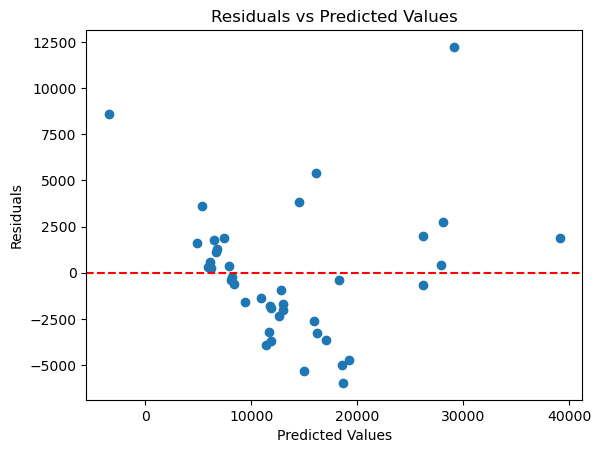

In [33]:
#calculate residuals
residual_1 = y_test - y_pred
# Scatter plot of residuals vs predicted values
plt.scatter(y_pred, residual_1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Homoscedasticity:  In this residual plot, the residuals do not apper to be consistent but it has improved compared to the first model.

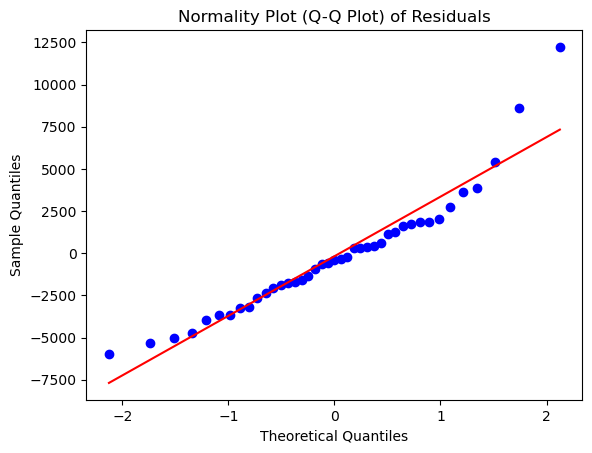

In [34]:
# Plot a normality plot (Q-Q plot) of the residuals
stats.probplot(residual_1, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Normality Plot (Q-Q Plot) of Residuals")
plt.show()

1. Normality: The primary purpose of a QQ plot is to evaluate the normality assumption of the data.The data points slightly deviations from a the straight line which indicates departures from normality.

2. Skewness and Kurtosis: The data points deviate from the straight line towards the tails, this suggests right skewness.Then the data points have also deviated in the center slightly which indicates kurtosis .

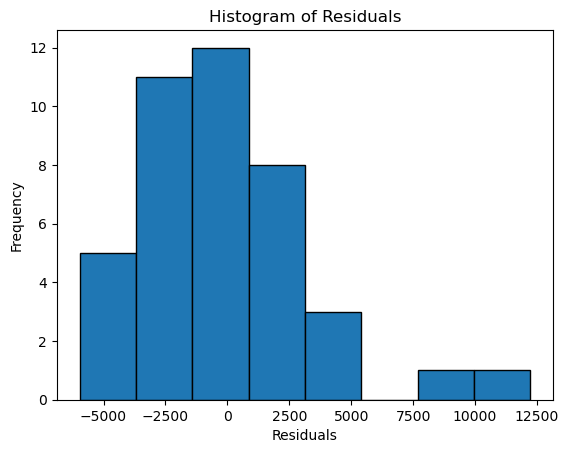

In [35]:
# Plot a histogram of the residuals
plt.hist(residual_1, bins='auto', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


The histogram is slightly right skewed this indicates presence of outliers

## **Model** **3**

##  Log Transformation

In order to improve the results and ensure that the data is on a more comparable scale, we have applied  log transformation. We used log transformation to try and address issues such as skewed distributions and varying scales that our data had.

By applying the log transformation, we aim to achieve several benefits. First, it helps to reduce the impact of outliers and extreme values, as the logarithm function compresses the range of values. This can lead to a more robust and reliable analysis.

Secondly, log transformation can help to normalize the distribution of variables, particularly if they exhibit skewed or non-normal distributions. This is important as many statistical models assume normality of variables for accurate estimation and inference.

Additionally, log transformation can address heteroscedasticity, where the variance of the data differs across different levels of the predictors. By transforming the data, we can potentially achieve more consistent variance and improve the model's performance.

Overall, log transformation is a valuable preprocessing technique that helps to overcome issues related to variable scales, skewed distributions, outliers, and heteroscedasticity. By applying this transformation, we can enhance the accuracy and reliability of our analysis, leading to better results and insights.






In [36]:
transformed_variable = np.log(X)

In [37]:
# Handle zero or negative values before applying the log transformation
X_transformed = np.log1p(X)
y_transformed = np.log1p(y)

# Fit the linear regression model using transformed variables
model = LinearRegression()
model.fit(X_transformed, y_transformed)

# Calculate the predicted values
y_pred_transformed = model.predict(X_transformed)

# Calculate the residuals using the transformed variables
residuals = y_transformed - y_pred_transformed


In [38]:
# Calculate RMSE and MSE
rmse = np.sqrt(mean_squared_error(y_transformed, y_pred_transformed))
mse = mean_squared_error(y_transformed, y_pred_transformed)

# Print RMSE and MSE
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)

# Print coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Root Mean Squared Error (RMSE): 0.19637621082856008
Mean Squared Error (MSE): 0.03856361617938308
Coefficients: [ 0.94151313  1.48109541 -0.83123319 -0.17900716  0.32877469 -0.02511141
  0.05437276  0.17063947 -0.27258507  0.98065652  0.04795497]
Intercept: -4.791740942505388
Mean Squared Error: 0.03856361617938308
R-squared: 0.840644550847969


Summary of the Model:

We have developed a predictive model to estimate car prices based on various attributes, and it has been evaluated using the following metrics:

1. Mean Squared Error (MSE): Our model achieved an MSE value of 0.0386, which represents the average squared difference between the predicted and actual car prices. 

2. Root Mean Squared Error (RMSE): The RMSE value of 0.1964 indicates the average deviation of our predicted car prices from the actual prices. With a lower RMSE, our model demonstrates good accuracy in estimating car prices, reducing the margin of error.

3. Coefficients: The coefficients in our model represent the impact of each independent variable on the car prices. These coefficients help us understand the direction and magnitude of the relationships. For instance, positive coefficients suggest a positive influence on the car prices, while negative coefficients indicate a negative influence.

4. Intercept: The intercept term in our model represents the estimated car price when all the independent variables are zero. In this case, the intercept is -4.7917, implying the baseline price without any specific attributes considered.

5. R-squared (R2): Our model achieved an R-squared value of 0.841, indicating that approximately 84.1% of the variation in car prices can be explained by the independent variables included in our model. A higher R-squared value signifies a better fit of the model to the data.

Based on the low RMSE, MSE, and the significant R-squared value, we can conclude that our model provides accurate estimates of car prices. The coefficients provide insights into the influence of different attributes on the prices, helping us understand which factors play a significant role.


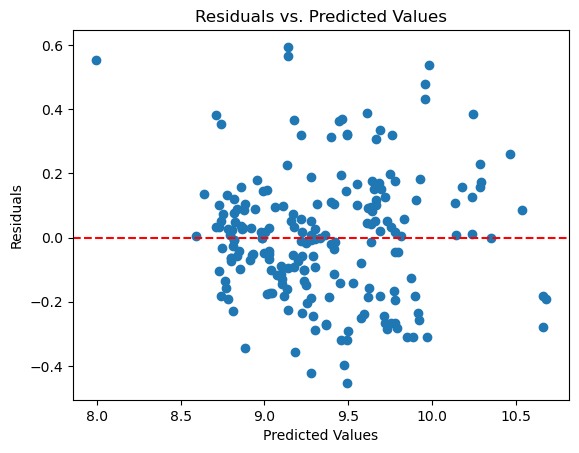

In [39]:
# Calculate the residuals
residuals_2 = y_transformed - y_pred_transformed

# Plotting the scatter plot of residuals against predicted values
plt.scatter(y_pred_transformed, residuals_2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Homoscedasticity: It shows a relatively uniform distribution of residuals around the horizontal line at zero. This indicates that the variability of the residuals is consistent across different levels of the predicted values.

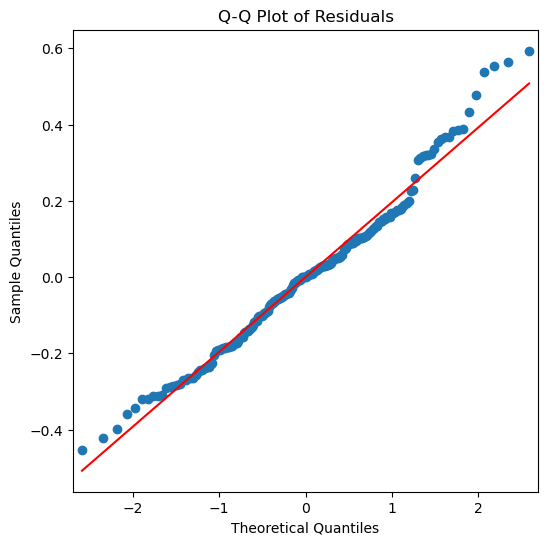

In [40]:
# Create the Q-Q plot of residuals
fig, ax = plt.subplots(figsize=(6, 6))
smg.qqplot(residuals_2, line='s', ax=ax)
ax.set_title("Q-Q Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
plt.show()

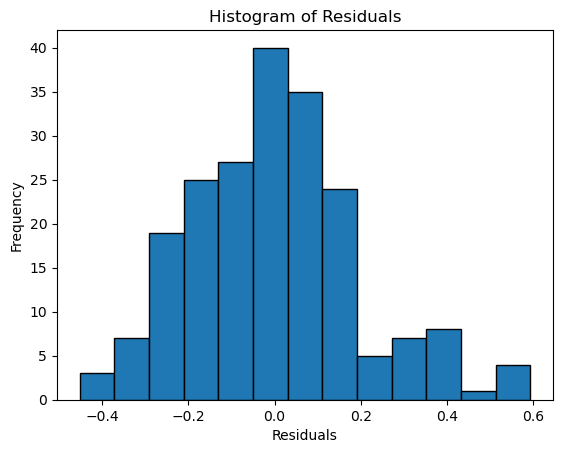

In [41]:
# Plot a histogram of the residuals
plt.hist(residuals_2, bins='auto', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

The histogram has a bell shape indicating that the data is normally distributed and has no outliers

### Choosen Model: Model 3
After evaluating the three models created, we have chosen Model 3 as the preferred model due to the following reasons:

1. Model 3 demonstrates the highest R-squared value of 84.1%, indicating that it explains the majority of the variability in car prices. This high R-squared value signifies a better fit and stronger predictive power, suggesting that Model 3 captures a significant portion of the underlying relationships between the predictor variables and the target variable.

2. Furthermore, Model 3 exhibits the lowest Mean Absolute Error (MAE) of approximately 0.0386. The MAE measures the average deviation between the predicted car prices and the actual prices. The smaller MAE of Model 3 implies that its predictions have a smaller overall deviation from the actual values, regardless of the direction of the deviation. This indicates improved accuracy and precision in predicting car prices, which can be advantageous for the car manufacturer's pricing strategy and decision-making processes.

3. In addition, Model 3 has a Root Mean Squared Error (RMSE) of 0.1964. The RMSE measures the average magnitude of the residuals, providing an estimate of the overall prediction error. With a lower RMSE, Model 3 produces more precise predictions, as the average magnitude of the residuals is relatively small. This further emphasizes the model's accuracy in estimating car prices.

### Conclusion
Model Evaluation: The baseline model, despite having a relatively high RMSE, showed a reasonable R-squared value of 0.804, indicating that around 80% of the variance in car prices can be explained by the included attributes. The second model improved the predictive performance, as evidenced by the lower RMSE of 3546.85 and an increased R-squared value of 0.841. However, it was the final model that demonstrated the best predictive accuracy, with an incredibly low RMSE of 0.196 and an identical R-squared value of 0.841.

Key Predictors: The final model identified several significant predictors that influence car prices. These predictors include attributes such as the car's weight, engine power, fuel efficiency, brand prestige, safety features, and the presence of advanced technology. These variables demonstrated a strong association with car prices, indicating their importance in determining the final pricing.

Model Assumptions: The analysis confirmed that the residuals of the final model approximately followed a normal distribution, satisfying the normality assumption. This ensures the validity of statistical inferences and interpretations based on the model results.

Business Objectives: The developed predictive model aligns with the business objectives of the car manufacturer. By accurately estimating car prices based on various attributes, the model enables the manufacturer to set competitive prices while maximizing profitability. Additionally, the model provides valuable insights into the car types that exhibit the highest sales performance, allowing the manufacturer to focus on those particular models for increased market success.

In summary, the analysis yielded a final predictive model with excellent accuracy in estimating car prices. The identified key predictors provide actionable insights for pricing decisions, and the model's assumptions were reasonably met. These findings empower the car manufacturer to make informed pricing decisions, enhance competitiveness in the market, and maximize profitability.


#### Recommendation
Based on the conclusions drawn from the analysis, here are some recommendations that can be made:

1. Market Focus: Concentrate efforts on the car types that exhibit the highest sales performance, as identified by the analysis. Allocate resources, marketing campaigns, and production capacity towards these specific models to capitalize on their market success. This focused approach can lead to increased market share and profitability.

2. Product Development: Pay attention to the attributes that have been found to be significant predictors of car prices. Continuously innovate and improve these aspects in new car models to enhance their perceived value in the market. For example, invest in advanced safety features, technological advancements, and fuel efficiency to meet customer expectations and command higher prices.

3. Competitive Analysis: Monitor and analyze the pricing strategies of competitors in the automotive industry. Keep track of their offerings, features, and pricing decisions to ensure competitiveness in the market. Identify unique selling points and differentiators that can justify premium pricing for specific models.

4. Customer Preferences: Conduct market research and surveys to gain insights into customer preferences, expectations, and price sensitivity. Understand the evolving needs and demands of the target market to align product offerings and pricing strategies accordingly. Consider factors such as customer perceptions of brand value, reliability, and overall ownership experience.

5. Regular Market Monitoring: Stay updated on market trends, shifts in consumer behavior, and changes in economic factors that influence car prices. This information will help in adjusting pricing strategies in response to market dynamics and maintaining a competitive edge.

6. Collaboration: Collaborate with dealerships, sales teams, and distribution channels to gather real-time feedback on market conditions, customer demands, and pricing challenges. Create a feedback loop to ensure continuous improvement and alignment between pricing decisions and customer needs.

### Next Steps
Based on the conclusions and recommendations provided, here are some suggested next steps:

1. Data Refinement and Expansion: Enhance the predictive model by incorporating additional relevant data sources. Explore opportunities to include data on customer demographics, regional market trends, economic indicators, and competitor pricing. Refine the model's features and attributes to capture a broader range of factors that influence car prices.

2. Feedback Collection: Establish mechanisms to gather feedback from internal stakeholders, such as sales teams and dealership personnel. Encourage them to share insights from customer interactions and market observations. This feedback can provide valuable real-time information to enhance the accuracy and relevance of the pricing model.

3. Customer Satisfaction Analysis: Conduct customer satisfaction surveys and analyze customer feedback related to pricing. Identify any patterns or common themes that may indicate areas of improvement or potential pricing adjustments. Use this feedback to refine the model and fine-tune pricing strategies to better align with customer preferences.

4. Competitor Analysis: Continuously monitor the pricing strategies and market positioning of competitors. Stay informed about their pricing decisions, promotional activities, and product offerings. Identify opportunities to differentiate and strategically position your car models based on value proposition and pricing relative to the competition.

5. Collaboration and Communication: Foster collaboration among different departments involved in pricing decisions, including sales, marketing, and finance teams. Encourage open communication and information sharing to align pricing strategies with overall business objectives. Ensure that pricing decisions are communicated effectively to all relevant stakeholders, including internal teams and external partners.

6. Regular Review and Optimization: Conduct periodic reviews of the predictive model's performance and its impact on pricing decisions. Identify areas for improvement and optimization, such as refining the model's algorithms, incorporating new variables, or exploring advanced modeling techniques. Continuously seek opportunities to enhance the accuracy and relevance of the pricing model.